# Lab session 2 ---- Logistic Regression

Student: Boudissa Selma                     
Date:21/03/18

In [43]:
import numpy as np
import matplotlib.pyplot as plt 

## I. Introduction
In this exercise, we will implement logistic regression.
Note that you should have completed Lab1, and, in particular, understand the gradient descent algorithm.

## II. Logistic regression
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
The file lab2data1.txt contains historical data from previous applicants. The first two columns correspond to the applicant’s scores on the two exams and the last column is the admission decision; a value equals to 0 means the applicant was not selected, while a value equals to 1 means that he/she was accepted.
Your task is to build a classifier that will estimate an applicant’s probability of admission based on his scores in the two exams.

### Solution Question 1

There is 100 samples and 2 features


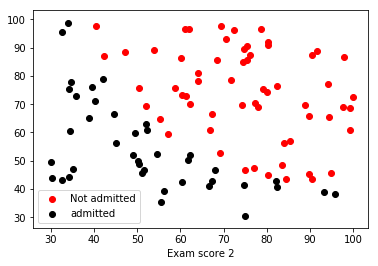

In [44]:

def plotData(X,y):
    idx = np.arange(0, X.shape[0])
    pos = idx [y == 1]
    neg = idx [y == 0]
    # plotting     
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], c='r', label='Not admitted')
    plt.scatter(X[neg, 0], X[neg, 1], c='k', label='admitted')
    plt.xlabel('Exam score 1')
    plt.xlabel('Exam score 2')
    plt.legend()
    plt.show()
    
# load the data
data = np.loadtxt("lab2data1.txt", delimiter=',')
#inpack the data
X = np.atleast_2d(data[:,:-1])
# target 
y = data[:,-1]
# print
print('There is {} samples and {} features'.format(X.shape[0],X.shape[1]))
plotData(X, y)

No handles with labels found to put in legend.


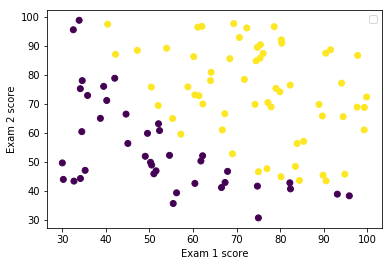

In [45]:
# other solution

# load the data
data = np.loadtxt("lab2data1.txt", delimiter=',')
X = np.atleast_2d(data[:, :-1])
y = data[:, -1]

X1 = data[:, 0]
X2 = data[:, 1]

#print the data
plt.scatter(X1,X2 , c=y , )
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()



### Solution Question 2

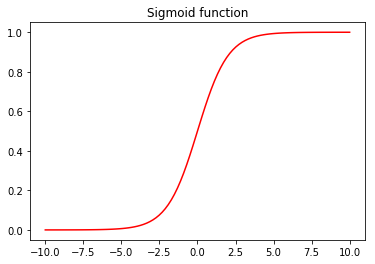

In [46]:
# Sigmoid function
def sigmoid(x):
    x =np.array(x).flatten()
    return (1/(1+np.exp(-x)))

x_tmp = np.linspace(-10,10,100)
y_tmp = sigmoid(x_tmp)

#plt.figure()
plt.plot(x_tmp, y_tmp,'r')
plt.title('Sigmoid function')
plt.show()

### Solution Question 3

In [47]:
def costfunction(theta, X, y, intercept=False):
    if intercept:
        X_ = np.asmatrix(X)
    else:
        intercept_array = np.ones((X.shape[0], 1))
        X_= (np.asmatrix(np.hstack((intercept_array, X))))
        n_samples = X_.shape[0]
        n_feature = X_.shape[1]
        hypothesis = sigmoid(X_.dot(theta).T)
    #print(n_samples)
        J = (1.0/n_samples) * np.sum(-y * np.log(hypothesis) - (1- y) * np.log(1- hypothesis))
    #print(hypothesis)
        return J 
     
        
        
def costFunction_der(theta, X, y, intercept=False):
    if intercept:
        X_ = np.asmatrix(X)
    else:
            intercept_array = np.ones((X.shape[0], 1))
            # add intercept
            X_ = np.asmatrix(np.hstack([intercept_array, X]))
          
            n_samples = X_.shape[0]
            n_feature = X_.shape[1]
            hypothesis = sigmoid(X_.dot(theta).T)
            error = hypothesis - y
          
            grad = []
          
            for i in range(0, theta.shape[0]):
                grad.append(1./n_samples * np.sum(error * (X_[:,i])))
    return grad 
            

In [48]:
[n_samples, n_features] = X.shape

initial_theta = np.zeros((n_features+1, 1))

cost = costfunction(initial_theta, X, y)
grad = costFunction_der(initial_theta, X, y)


print(cost)
print(grad)


0.6931471805599453
[-0.1, -12.009216589291153, -11.262842205513593]


### Solution Question 4

In [49]:
#import scipy.optimize as opt
#Result = opt.minimize(fun = costfunction, x0 = initial_theta, args = (X,y), 
 #                             method = 'TNC', jac=costFunction_der)

#theta = Result.x

#print('The results from the optimization w ={}'.format(theta))


import scipy.optimize as opt
ncols = np.size(X, 1)
w_init = np.zeros((ncols + 1, 1))

Results = opt.minimize(costfunction, w_init, args=(X, y), method='TNC', jac = costFunction_der)

theta = Results.x

print('The results from the optimization w ={}'.format(theta))
 

The results from the optimization w =[-25.16131859   0.20623159   0.20147149]


### Solution Question 5

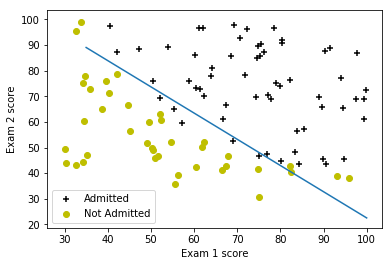

In [50]:
# Teacher's code
#def plotDecisionBoundary(theta, X, y, option):
 #   idx = np.arrange(0, X.shape[0])
#  pos = idx [y == 1]
#    neg = idx [y == 0]
#    #plot the figure
#    plt.scatter(X[pos, 0], X[pos, 1], c='r')
#    plt.scatter(X[neg, 0], X[neg, 1], c='k')
    #
#    plt.xlabel('Exam score 1')
#    plt.ylabel('Exam score 2')
    
#    if option =='line':
        
#        plot_x = np.array([min(X[:,1])-2, max(x[:,1])+2])
#        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
#        print(plot_x)
#        print(plot_y)
#        plt.plot(plot_x, plot_y)
       
#        plot.show()
        
# Other way to answer the question 

#Data with positive labels (label = 1)
idx = (y == 1)
Xpos = X[idx,:]
p1 = plt.scatter(Xpos[:,0], Xpos[:,1], marker = '+', color = 'k')

#Data with negative labels (label = 0)
idx = (y == 0)
Xneg = X[idx,:]
p2 = plt.scatter(Xneg[:,0], Xneg[:,1], marker = 'o', color = 'y')

# Create scatter plot of the labelled datapoints
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend([p1, p2], ["Admitted", "Not Admitted"])

# plot the decision boundary
x_w = np.linspace(35.0, 100.0, num = 1000)
y_w = -(theta[0] + theta[1]*x_w)/theta[2] 

plt.plot(x_w, y_w)

plt.show()

     
        
        

### Solution Question 6

In [96]:
# This code will provide the training accuracy of the 
# model which should be around 89 %


def predict(theta, X):
    m, n = X.shape
    p = zeros(shape=(m, 1))

    h = sigmoid(X.dot(theta.T))

    for it in range(0, h.shape[0]):
        if h[it] > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p

#Compute accuracy on our training set
p = predict(np.array(theta), it)
print ('Train Accuracy: %f' % ((y[where(p == y)].size / float(y.size)) * 100.0))
#print('The results from the optimization w ={}'.format(theta))

NameError: name 'it' is not defined

### III. Logistic regression with regularization
In this part, we will see the full power of logistic regression. Suppose that you are the production manager of a factory that produces microchips. After production, each microchip goes through various tests to ensure it functions correctly.
The file lab2data2.txt contains test results for some microchips on two tests. The first two columns correspond to the tests results, and the last column indicates whether the microchip should be accepted or not; 0 means rejected while 1 means accepted.
Using your function plotData(X,y), you can visualize the training data. As can be seen in Figure 3, this data is clearly not linearly separable, so a straight-forward application of logistic regression will not find a good decision boundary.



### Solution Question 1

In [51]:
# First step load the data2
# load the data
data = np.loadtxt("lab2data1.txt", delimiter=',')

In [52]:


def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)



In [53]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);
  

In [54]:
# load the data
data = np.loadtxt("lab2data1.txt", delimiter=',')

In [55]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]


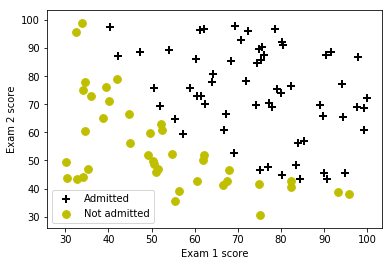

In [56]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.show()

### Solution Question 2

In [57]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [58]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)




Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [59]:
from scipy.optimize import minimize
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557642e-09,  4.36433473e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

### Solution Question 3

In [60]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))



In [61]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(res.x.T))



0.7762903249331018

In [62]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


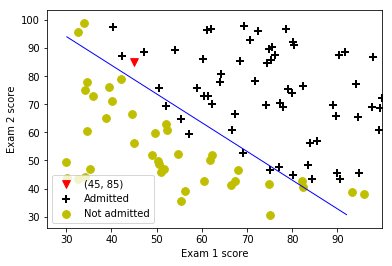

In [63]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

### Logistic regression with regularization

In [66]:
# load the data
data2 = np.loadtxt("lab2data2.txt", delimiter=',')

In [67]:
y = np.c_[data2[:,2]]
X = data2[:,0:2]



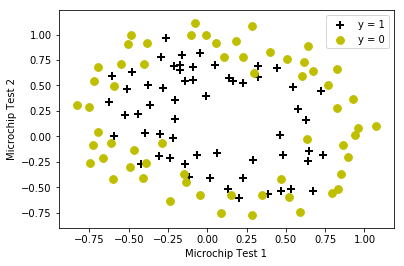

In [68]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plt.show()

In [69]:

from sklearn.preprocessing import PolynomialFeatures

# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape



(118, 28)

In [70]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])


def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())



In [73]:


initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)



0.6931471805599453

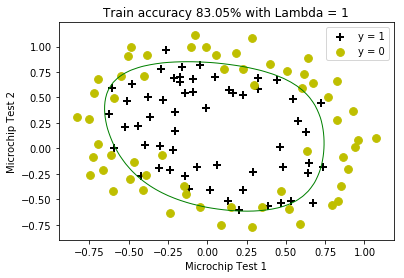

In [95]:
lambda_ref = 1
res2 = minimize(costFunctionReg, initial_theta, args=(lambda_ref, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
    #plot decision boundary

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lambda_ref))
plt.show()

### Solution Question 4

E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


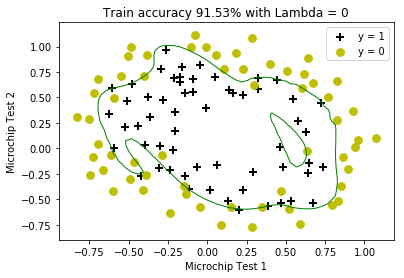

In [145]:
# trying with differents values of lambda
lambda_ref = 0
res2 = minimize(costFunctionReg, initial_theta, args=(lambda_ref, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
    #plot decision boundary

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lambda_ref))
plt.show()

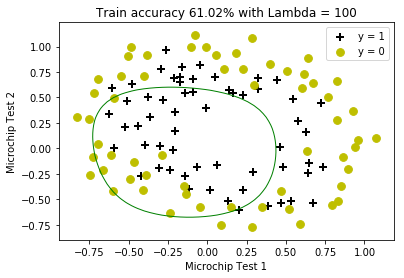

In [98]:
# trying with differents values of lambda
lambda_ref = 100
res2 = minimize(costFunctionReg, initial_theta, args=(lambda_ref, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
    #plot decision boundary

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lambda_ref))
plt.show()

### Conclusion
As you can see on the above figure lambda as a influcence on the decision boundary. For example with lambda=100 there is too much regularization and for a lambda=0 there is no regularization. So for a good regularaization lambda=1 is good. 
